# Naive Bayes

In [1]:
from sklearn.naive_bayes import GaussianNB

In [2]:
import pickle
with open("prestamo.pkl", "rb") as f:
    X_prestamo_entrenamiento, y_prestamo_entrenamiento, X_prestamo_prueba, y_prestamo_prueba = pickle.load(f)

In [3]:
X_prestamo_entrenamiento.shape, y_prestamo_entrenamiento.shape

((2968, 13), (2968,))

In [4]:
X_prestamo_prueba.shape, y_prestamo_prueba.shape

((1273, 13), (1273,))

## Modelo de entrenamiento 

In [5]:
naive_bayes_prestamo = GaussianNB()
naive_bayes_prestamo.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)

GaussianNB()

## Modelo de prueba

In [6]:
prevision = naive_bayes_prestamo.predict(X_prestamo_prueba)

In [7]:
prevision

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype='<U8')

In [8]:
y_prestamo_prueba

array(['Approved', 'Approved', 'Approved', ..., 'Approved', 'Approved',
       'Rejected'], dtype=object)

## Comparar el modelo de prueba con el modelo original
##### 0 - Approved       1 - Rejected

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Puntuación de precisión

In [10]:
accuracy_score(prevision,y_prestamo_prueba)

0.9324430479183032

In [11]:
confusion_matrix(prevision,y_prestamo_prueba)

array([[744,  43],
       [ 43, 443]], dtype=int64)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

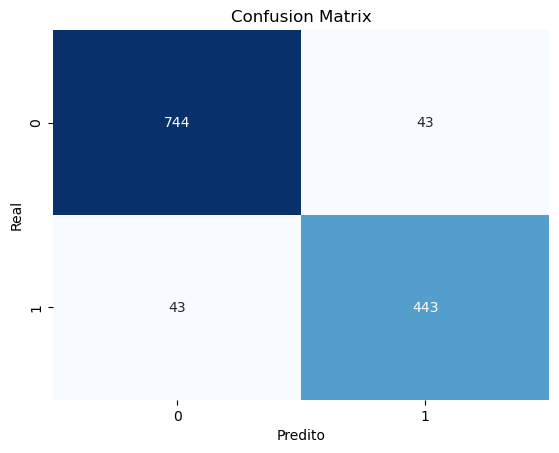

In [13]:
cm = confusion_matrix(prevision,y_prestamo_prueba)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()

In [14]:
from yellowbrick.classifier import ConfusionMatrix

0.9324430479183032

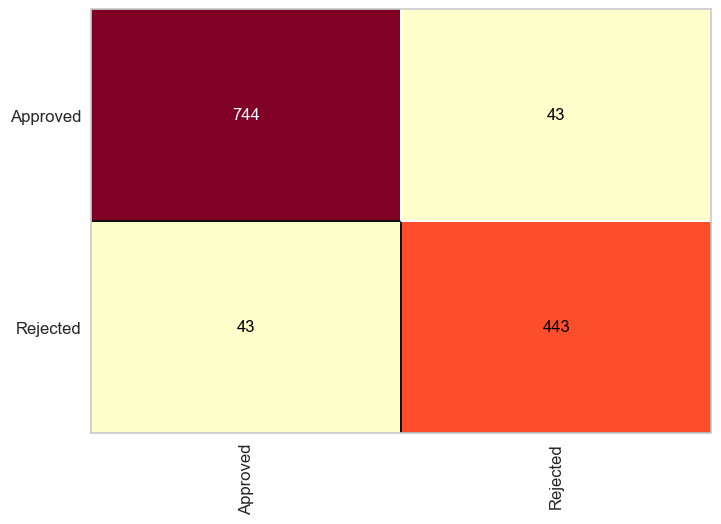

In [15]:
cm = ConfusionMatrix(naive_bayes_prestamo)
cm.fit(X_prestamo_entrenamiento,y_prestamo_entrenamiento)
cm.score(X_prestamo_prueba,y_prestamo_prueba)
